In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline  

# Load cleaned data
df = pd.read_csv(r"C:\Users\youg_\capstone-project-YougOsti\Data\Raw\Weather&Climate_data\annual-minimum-and-maximum-temperature-by-stations_NSO.csv", low_memory=False)


In [4]:
df.sample(4)

,Station,District,Elevation(masl),Max,Min,Year
267,Lahan,Siraha,110.0,30.4,19.0,2018
713,Manthali,Ramechhap,497.0,30.4,NaN,2021
755,Dainsili Sidhhapur,Baitadi,2083.0,NaN,11.2,2022
209,Taulihawa,Kapilvastu,106.0,30.1,19.0,2018


In [5]:
import pandas as pd

# Define input and output paths
input_path = r"C:\Users\youg_\capstone-project-YougOsti\Data\Raw\Weather&Climate_data\annual-minimum-and-maximum-temperature-by-stations_NSO.csv"
output_path = r"C:\Users\youg_\capstone-project-YougOsti\Data\processed\temperature_cleaned.csv"

# Load the dataset
df = pd.read_csv(input_path)

# Check missing values
print("Missing values before cleaning:\n", df.isnull().sum())

# Drop rows where either Max or Min temperature is missing
df_cleaned = df.dropna(subset=["Max", "Min"])

# Optional: Drop rows where Elevation is missing if any
df_cleaned = df_cleaned.dropna(subset=["Elevation(masl)"])

# Save cleaned data to target folder
df_cleaned.to_csv(output_path, index=False)

print(f"✅ Cleaned temperature data saved to:\n{output_path}")


Missing values before cleaning:
 Station              0
District            66
Elevation(masl)     24
Max                268
Min                396
Year                 0
dtype: int64
✅ Cleaned temperature data saved to:
C:\Users\youg_\capstone-project-YougOsti\Data\processed\temperature_cleaned.csv


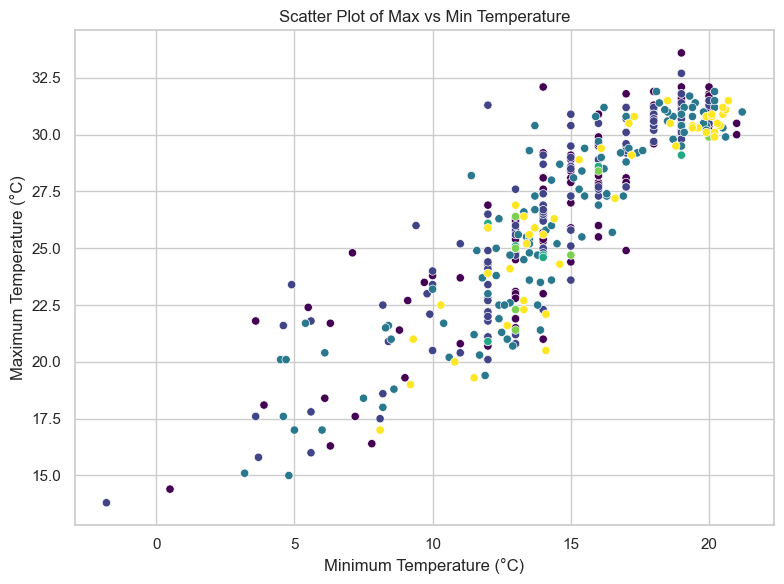

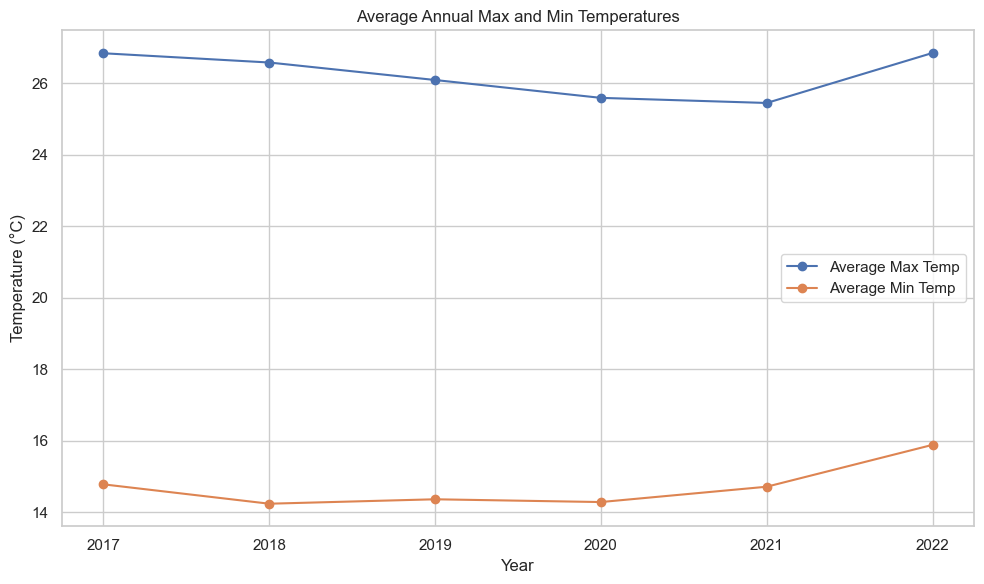

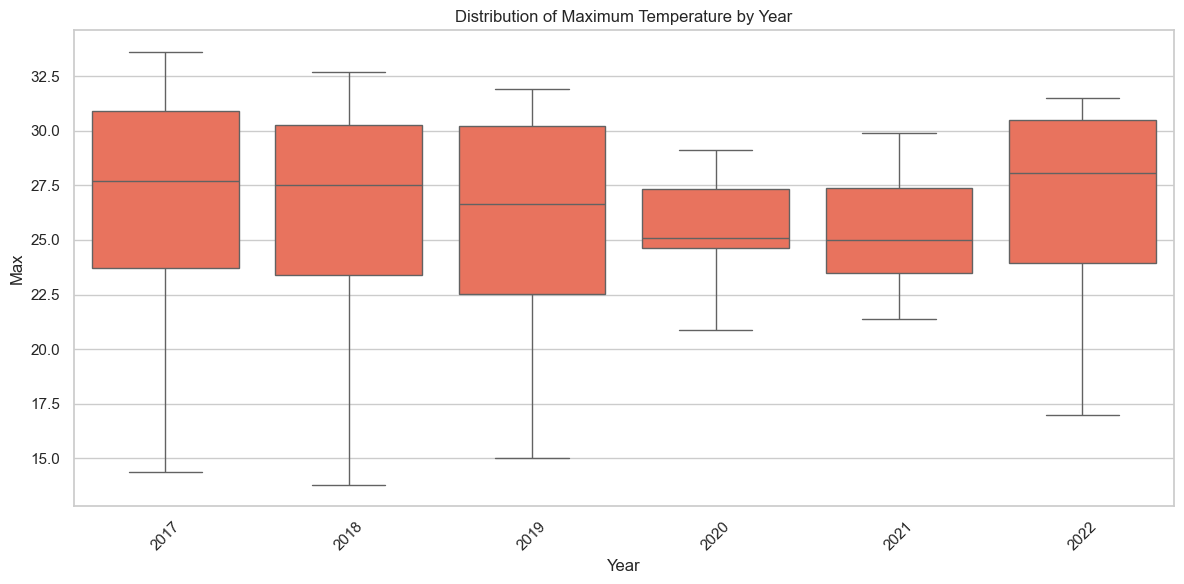

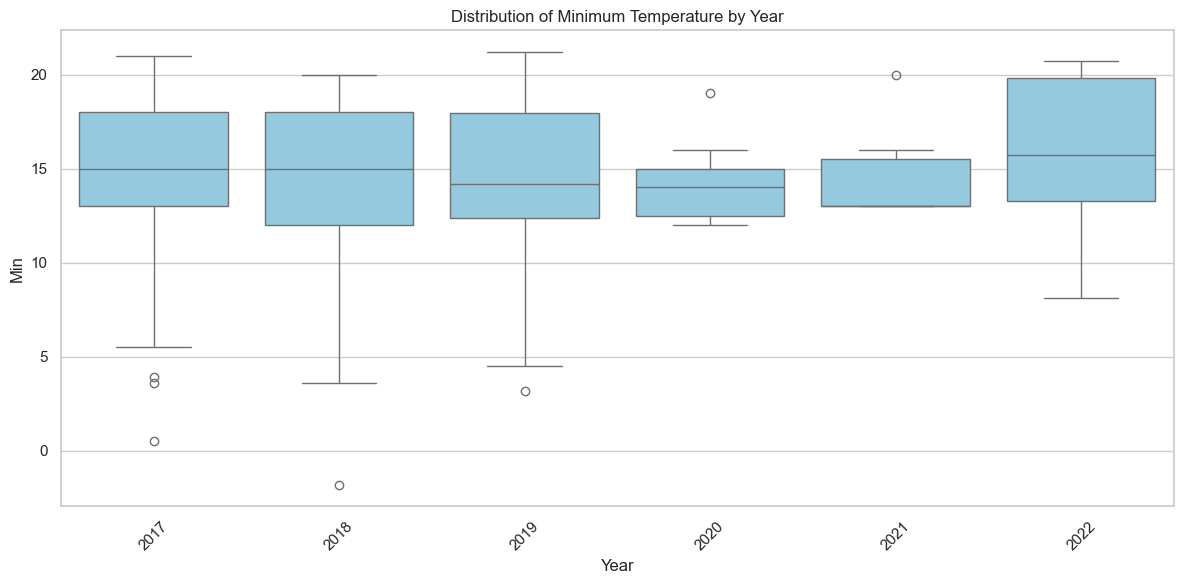

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned data
file_path = r"C:\Users\youg_\capstone-project-YougOsti\Data\processed\temperature_cleaned.csv"
df = pd.read_csv(file_path)

# Set plot style
sns.set(style="whitegrid")

# 1. Scatter plot of Max vs Min temperature
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Min", y="Max", hue="Year", palette="viridis", legend=False)
plt.title("Scatter Plot of Max vs Min Temperature")
plt.xlabel("Minimum Temperature (°C)")
plt.ylabel("Maximum Temperature (°C)")
plt.tight_layout()
plt.show()

# 2. Line plot of annual Max and Min temperature averages
annual_avg = df.groupby("Year")[["Max", "Min"]].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(annual_avg["Year"], annual_avg["Max"], label="Average Max Temp", marker='o')
plt.plot(annual_avg["Year"], annual_avg["Min"], label="Average Min Temp", marker='o')
plt.title("Average Annual Max and Min Temperatures")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.tight_layout()
plt.show()

# 3. Boxplot to examine temperature distributions by year
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Year", y="Max", color="tomato")
plt.title("Distribution of Maximum Temperature by Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Optional: Boxplot for Min temperature too
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Year", y="Min", color="skyblue")
plt.title("Distribution of Minimum Temperature by Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
